In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('ip_network.csv')

In [3]:
df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


Rename Columns to meaningful titles

In [4]:
df.columns = ['date',
             'localip',
             'remoteASN',
             'flows']

Creating a separate column where its a '1' if the number of flows is greater than 1

In [5]:
df['flag'] = [0 if x<2 else 1 for x in df['flows']]

In [6]:
df.head()

,date,localip,remoteASN,flows,flag
0,2006-07-01,0,701,1,0
1,2006-07-01,0,714,1,0
2,2006-07-01,0,1239,1,0
3,2006-07-01,0,1680,1,0
4,2006-07-01,0,2514,1,0


Plotting how many times the network's 'flows' is more than 1

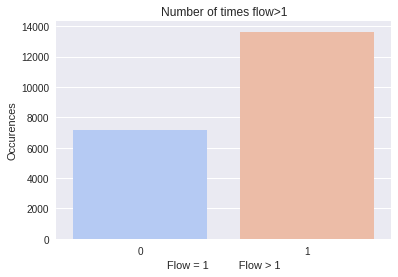

In [7]:
fig_flag = sns.countplot(data=df, x='flag', palette = 'coolwarm')
fig_flag.set(xlabel = 'Flow = 1          Flow > 1', ylabel = 'Occurences',title = 'Number of times flow>1')


Scatter plot of ip addresses and flows, hue set to flag

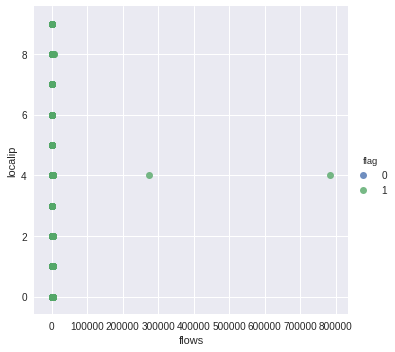

In [8]:
sns.lmplot(data=df, y='localip', x='flows', fit_reg = False, hue = 'flag')

There are several huge outliers so not much can be attained through this method unless we identify the outlier.  I would like to assume that the outlier is a remote person trying to compromise the systems in the networks where the clusters are

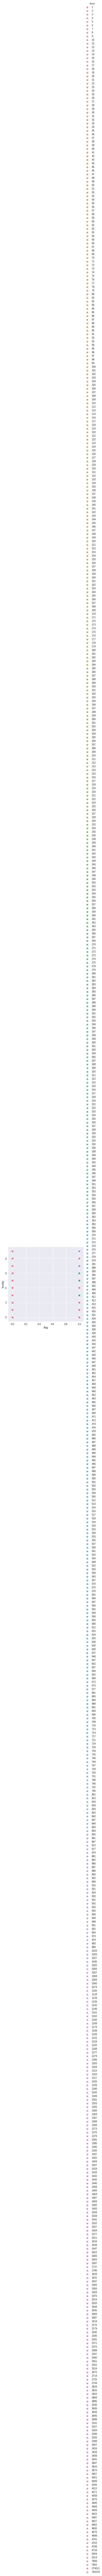

In [9]:
sns.lmplot(data = df, y = 'localip', x = 'flag', fit_reg = False, hue = 
           'flows')